In [7]:
# -----------------------------------------------------------------------------
# :author:    Juanjuan Huang & Shelly D. Keylly
# :email:     juanjuan.huang@anl.gov
# :copyright: Copyright © 2023, UChicago Argonne, LLC
# -----------------------------------------------------------------------------


# Imports

In [3]:
%matplotlib widget
import neighbor_core as nc
from neighbor_core import ClusterNeighbor
from ipyfilechooser import FileChooser
import numpy as np

# Initialize a cluster and view it

In [4]:
fc = FileChooser()
display(fc)

FileChooser(path='/home/beams0/JUANJUAN.HUANG/src/neighbor', filename='', title='', show_hidden=False, select_…

# view it

In [5]:
cluster = ClusterNeighbor()
if fc.value is not None:
    cluster.load_xyz(path=fc.value)
else:
    cluster.load_xyz(path="structure_examples/198087-ICSD molecule.xyz")
cluster.view_xyz(label=True, show_symbol=True)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

# Plot histogram

In [6]:
cluster.get_pairs()
cluster.plot_hist(plot_engine="plotly")

# Get CN reports and save to excel

In [8]:
cluster.get_CN_summary_all(tolerance=0.1, bond_range=5, printit=False)
cluster.print_CN_summary()
cluster.write_to_excel("20240806_test_original.xlsx")

Bond Type: O-O
-- Distance: 2.707596806026806
-- Average CN: 0.7272727272727273
-- Info: 
12 atoms have CN of 0; 
32 atoms have CN of 1; 
-- Tolerance: 0.1 

-- Distance: 3.056656193800888
-- Average CN: 5.090909090909091
-- Info: 
4 atoms have CN of 2; 
18 atoms have CN of 4; 
16 atoms have CN of 6; 
6 atoms have CN of 8; 
-- Tolerance: 0.1 

-- Distance: 3.389999705849734
-- Average CN: 1.2727272727272727
-- Info: 
32 atoms have CN of 1; 
12 atoms have CN of 2; 
-- Tolerance: 0.1 

-- Distance: 3.597255223529738
-- Average CN: 0.9090909090909091
-- Info: 
14 atoms have CN of 0; 
20 atoms have CN of 1; 
10 atoms have CN of 2; 
-- Tolerance: 0.1 

-- Distance: 4.328013369355418
-- Average CN: 1.5
-- Info: 
28 atoms have CN of 1; 
10 atoms have CN of 2; 
6 atoms have CN of 3; 
-- Tolerance: 0.1 

-- Distance: 4.9524037543295805
-- Average CN: 3.272727272727273
-- Info: 
14 atoms have CN of 2; 
8 atoms have CN of 3; 
20 atoms have CN of 4; 
2 atoms have CN of 6; 
-- Tolerance: 0.1 

Bond

# remove undercoordinated atoms

In [12]:
cluster.remove_under_coordinated_atoms(center_atom="Pb", CN_atom="O", CN_threshold=7, bond_range=4, self_apply=True)
cluster.view_xyz(label=True, show_symbol=True)

Remove under-coordinated atoms: Atoms(symbols='Pb4', pbc=False)[[22, 37, 57, 58]]


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [9]:
cluster.get_CN_summary_all(tolerance=0.1, bond_range=5, printit=False)
cluster.print_CN_summary()
cluster.write_to_excel("20240807_test_reduced.xlsx")

Bond Type: O-O
-- Distance: 2.707596806026806
-- Average CN: 0.7272727272727273
-- Info: 
12 atoms have CN of 0; 
32 atoms have CN of 1; 
-- Tolerance: 0.1 

-- Distance: 3.056656193800888
-- Average CN: 5.090909090909091
-- Info: 
4 atoms have CN of 2; 
18 atoms have CN of 4; 
16 atoms have CN of 6; 
6 atoms have CN of 8; 
-- Tolerance: 0.1 

-- Distance: 3.389999705849734
-- Average CN: 1.2727272727272727
-- Info: 
32 atoms have CN of 1; 
12 atoms have CN of 2; 
-- Tolerance: 0.1 

-- Distance: 3.597255223529738
-- Average CN: 0.9090909090909091
-- Info: 
14 atoms have CN of 0; 
20 atoms have CN of 1; 
10 atoms have CN of 2; 
-- Tolerance: 0.1 

-- Distance: 4.328013369355418
-- Average CN: 1.5
-- Info: 
28 atoms have CN of 1; 
10 atoms have CN of 2; 
6 atoms have CN of 3; 
-- Tolerance: 0.1 

-- Distance: 4.9524037543295805
-- Average CN: 3.272727272727273
-- Info: 
14 atoms have CN of 2; 
8 atoms have CN of 3; 
20 atoms have CN of 4; 
2 atoms have CN of 6; 
-- Tolerance: 0.1 

Bond

# Example 2: Polynomial fits of different shells

## select a cif file

In [10]:
fc = FileChooser()
display(fc)

FileChooser(path='/home/beams0/JUANJUAN.HUANG/src/neighbor', filename='', title='', show_hidden=False, select_…

In [11]:
cif_cluster = ClusterNeighbor()
if fc.value is not None:
    cif_cluster.load_xyz(path=fc.value)
else:
   cif_cluster.load_xyz(path="test_Pt/Ptfoil_243678.cif")
cif_cluster.view_xyz(label=True, show_symbol=True)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

# rewrite using expand_to_sphere

## For multiple shells with undercoordinated atoms removed

In [23]:
center_atom = "Pt"
CN_atom = "Pt"
CN_bond_range = 6
tolerance = 0.1
undercoordinated_threshold = 4

# Initialize dictionaries to store results
CNs_all = {}
bondlengths_all = {}
num_atoms_all = {}
sizes_all = {}

sizes = np.hstack([np.arange(5, 20, 2), np.arange(20, 60, 10)])
# sizes = np.hstack([np.arange(5, 20, 5), np.arange(20, 50, 10)])

for i in sizes:
    expanded_cluster = cif_cluster.expand_to_sphere(target_diameter=i, self_apply=False)
    new_cluster = ClusterNeighbor()
    new_cluster.load_xyz(from_file=False, atom_object=expanded_cluster)
    num_atoms = len(new_cluster.atoms)
    new_cluster.atoms.set_pbc(False)

    if 4 < num_atoms < 100:
        new_cluster.remove_under_coordinated_atoms(center_atom=center_atom, 
                                                   CN_atom=CN_atom, 
                                                   CN_threshold=undercoordinated_threshold, 
                                                   bond_range=5, 
                                                   self_apply=True)
    
    new_cluster.get_CN_summary_all(tolerance=tolerance, 
                                   bond_range=CN_bond_range, 
                                   printit=False)
    
    # Get bond lengths for each shell
    bond_lengths = list(new_cluster.CN_summary[f'{center_atom}-{CN_atom}'].keys())
    new_cluster.write_to_excel(f"size_{new_cluster.get_cluster_size():.2f}A")
    # new_cluster.print_CN_summary()
    for shell_index, bond_length in enumerate(bond_lengths):
        shell_key = f'shell_{shell_index + 1}'
        
        # Ensure the key exists in each dictionary
        if shell_key not in CNs_all:
            CNs_all[shell_key] = []
            bondlengths_all[shell_key] = []
            num_atoms_all[shell_key] = []
            sizes_all[shell_key] = []
        
        # Append data to the relevant shell
        bondlengths_all[shell_key].append(bond_length)
        CNs_all[shell_key].append(new_cluster.CN_summary[f'{center_atom}-{CN_atom}'][bond_length]['average_CN'])
        sizes_all[shell_key].append(new_cluster.get_cluster_size())
        num_atoms_all[shell_key].append(num_atoms)
    
    print(f"Processed size: {new_cluster.get_cluster_size()} A with {len(bond_lengths)} shells")
    # print(new_cluster.CN_summary[f'{center_atom}-{CN_atom}'])
    # new_cluster.view_xyz(label=False)


Processed size: 2.774093039679816 A with 1 shells
No under-coordinated atoms found.
Processed size: 6.203060612633091 A with 4 shells
No under-coordinated atoms found.
Processed size: 8.322279119039449 A with 4 shells
No under-coordinated atoms found.
Processed size: 10.002134697473334 A with 4 shells
No under-coordinated atoms found.
Processed size: 12.091991219943887 A with 4 shells
Processed size: 13.870465198399081 A with 4 shells
Processed size: 16.874149197325476 A with 4 shells
Processed size: 18.60918183789927 A with 4 shells
Processed size: 19.418651277758716 A with 4 shells
Processed size: 29.489013509888732 A with 4 shells
Processed size: 39.718967755015996 A with 4 shells
Processed size: 49.546885971806546 A with 4 shells


  Coefficient         Value
0    Constant -2.633951e-01
1         x^1  1.428981e+00
2         x^2 -9.091679e-02
3         x^3  3.132694e-03
4         x^4 -5.399403e-05
5         x^5  3.617144e-07
  Coefficient         Value
0    Constant -3.609076e+00
1         x^1  1.265255e+00
2         x^2 -8.771044e-02
3         x^3  3.172401e-03
4         x^4 -5.610682e-05
5         x^5  3.811183e-07
  Coefficient         Value
0    Constant -8.072254e+00
1         x^1  2.592739e+00
2         x^2 -1.088730e-01
3         x^3  2.438004e-03
4         x^4 -2.733106e-05
5         x^5  1.192050e-07
  Coefficient         Value
0    Constant -3.935280e+00
1         x^1  1.037755e+00
2         x^2 -2.994489e-02
3         x^3  2.553641e-04
4         x^4  3.736170e-06
5         x^5 -5.880150e-08


/tmp/ipykernel_1560828/610730437.py:12: UserWarning:

The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x7fd0907cc700> starts with '_'. It is thus excluded from the legend.

/tmp/ipykernel_1560828/610730437.py:12: UserWarning:

The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x7fd0e425b0d0> starts with '_'. It is thus excluded from the legend.

/tmp/ipykernel_1560828/610730437.py:12: UserWarning:

The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x7fd0dc248e80> starts with '_'. It is thus excluded from the legend.

/tmp/ipykernel_1560828/610730437.py:12: UserWarning:

The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x7fd0910eb5b0> starts with '_'. It is thus excluded from the legend.



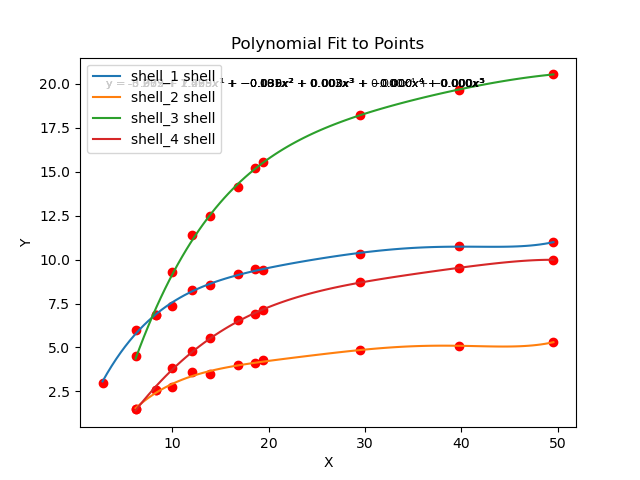

In [25]:
from neighbor_core import fit_polynomial
import matplotlib.pyplot as plt

plt.figure()
for i in range(1, 5):
    shell = f'shell_{i}'
    polynomial = fit_polynomial(np.array(sizes_all[shell]), 
                                np.array(CNs_all[shell]), 
                                degree=5, new_figure=False)

legend_labels = sum([[ '_nolegend', f'{shell} shell'] for shell in CNs_all.keys()], []);
plt.legend(legend_labels)

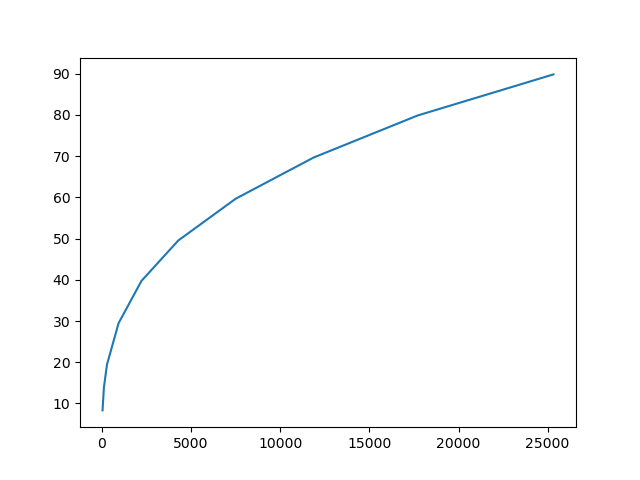

In [18]:
plt.figure()
plt.plot(num_atoms_all[shell], sizes_all[shell])
# for i in range(1, 5):
    # shell = f'shell_{i}'
    # plt.plot(num_atoms_all[shell], sizes_all[shell])

# ASE cluster magic numbers

In [1]:
from ase.cluster import Cluster
from ase.cluster import Icosahedron

# Create a simple cluster with 13 atoms
atoms = Icosahedron('Cu', noshells=3)

view = ClusterNeighbor()
view.load_xyz(from_file=False, atom_object=atoms)
view.view_xyz(label=True, show_symbol=True)


NameError: name 'ClusterNeighbor' is not defined

# Wulff construction examples

In [10]:
from ase.cluster.wulff import wulff_construction
import py3Dmol

# Create a Wulff construction for Cu with specific Miller indices and surface energies
atoms = wulff_construction('Cu', surfaces=[(1, 0, 0), 
                                           (1, 1, 1), 
                                           (1, 1, 0)], 
                           energies=[1.0, 1.0, 1.0], 
                           size=60, 
                           structure='fcc')


view = ClusterNeighbor()
view.load_xyz(from_file=False, atom_object=atoms)
view.view_xyz(label=True, show_symbol=True)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol